In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HappY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
data_false = pd.read_csv("Fake.csv")
data_true = pd.read_csv("True.csv")

In [3]:
data_false["class"] = 0
data_true["class"] = 1

In [4]:
data_merge = pd.concat([data_false, data_true],ignore_index=True)
#data_merge

In [5]:
data_merge.groupby("class").describe()

title                                                                 \
      count unique                                                top freq   
class                                                                        
0      1000   1000   WATCH: Jake Tapper Rips Scaramucci A New One ...    1   
1      1000    995  Trump taps Fed centrist Powell to lead U.S. ce...    2   

       text                                                                 \
      count unique                                                top freq   
class                                                                        
0      1000   1000  When the Trump administration hired a tiny two...    1   
1      1000    993  WASHINGTON (Reuters) - The U.S. Senate on Thur...    2   

      subject                             date                                  
        count unique           top  freq count unique                 top freq  
class                                                                           
0        1000      1          News  1000  1000    180       July 24, 2017   23  
1        1000      1  politicsNews  1000  1000     69  November 30, 2017    45

<AxesSubplot:>

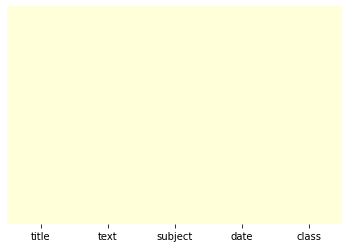

In [6]:
#IF YOU DON'T SEE ANY VERTICAL BAR IN THE BELOW GRAPH, THEN YOU DON'T HAVE ANY MISSING VALUES IN ANY OF THE FIELDS
import seaborn as sns
sns.heatmap(data_merge.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [7]:
data_merge = data_merge.drop(['text', 'subject','date'], axis=1)
data_merge.head()

,title,class
0,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,0


In [8]:
data_merge['title'] = data_merge['title'].astype(str)

In [9]:
def word_count(sentence):
  return len(sentence.split())

data_merge['word count'] = data_merge['title'].apply(word_count)
data_merge.head()

,title,class,word count
0,Donald Trump Sends Out Embarrassing New Year’...,0,12
1,Drunk Bragging Trump Staffer Started Russian ...,0,8
2,Sheriff David Clarke Becomes An Internet Joke...,0,15
3,Trump Is So Obsessed He Even Has Obama’s Name...,0,14
4,Pope Francis Just Called Out Donald Trump Dur...,0,11


In [10]:
import matplotlib.pyplot as plt
x = data_merge['word count'][data_merge['class'] == 1]
y = data_merge['word count'][data_merge['class'] == 0]
x.head()

1000    10
1001     9
1002    10
1003     9
1004    11
Name: word count, dtype: int64

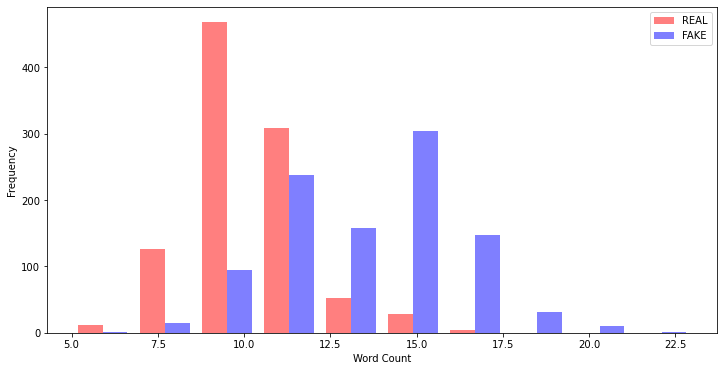

In [11]:
# Plotting the word count distribution for both FAKE and REAL news
plt.figure(figsize = (12,6))
plt.xlabel('Word Count')
plt.ylabel('Frequency')
g =plt.hist([x, y],color = ['r','b'], alpha = 0.5,label = ['REAL','FAKE'])
plt.legend(loc = 'upper right')
plt.show()

In [12]:
#THE BELOW SET OF FUNCTIONS CLEANS YOUR CODE . I.E FROM PUNCTUATION REMOVAL , STOPWORDS REMOVAL , STEMMING PROCESS ,
#LEMMATIZATION PROCESS

all_punctuations = string.punctuation + '‘’,:”][],'

def punc_remover(raw_text):
    no_punct = "".join([i for i in raw_text if i not in all_punctuations])
    return no_punct

In [13]:
def stopword_remover(no_punc_text):
    words = no_punc_text.split()
    no_stp_words = " ".join([i for i in words if i not in stopwords.words('english')])
    return no_stp_words

In [14]:
lemmer = nltk.stem.WordNetLemmatizer()
def lem(words):
    return " ".join([lemmer.lemmatize(word,'v') for word in words.split()])

In [15]:
def text_cleaner(raw):
    cleaned_text = stopword_remover(punc_remover(raw))
    return lem(cleaned_text)

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HappY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HappY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
data_merge['SECTION_CLEANED'] = data_merge['title'].apply(text_cleaner)
#combined_df.to_excel("output.xlsx")  # SAVE THE FINAL CLEANED COPY IF YOU WANT
data_merge.head()

,title,class,word count,SECTION_CLEANED
0,Donald Trump Sends Out Embarrassing New Year’...,0,12,Donald Trump Sends Out Embarrassing New Years ...
1,Drunk Bragging Trump Staffer Started Russian ...,0,8,Drunk Bragging Trump Staffer Started Russian C...
2,Sheriff David Clarke Becomes An Internet Joke...,0,15,Sheriff David Clarke Becomes An Internet Joke ...
3,Trump Is So Obsessed He Even Has Obama’s Name...,0,14,Trump Is So Obsessed He Even Has Obamas Name C...
4,Pope Francis Just Called Out Donald Trump Dur...,0,11,Pope Francis Just Called Out Donald Trump Duri...


In [19]:
data_merge.to_csv("final_cleaned_data.csv")
  # SAVE THE FINAL CLEANED COPY IF YOU WANT

In [20]:
df = pd.read_csv("final_cleaned_data.csv")
df = pd.DataFrame(df)
df['SECTION_CLEANED'] = df['SECTION_CLEANED'].astype(str)
df.head()

,Unnamed: 0,title,class,word count,SECTION_CLEANED
0,0,Donald Trump Sends Out Embarrassing New Year’...,0,12,Donald Trump Sends Out Embarrassing New Years ...
1,1,Drunk Bragging Trump Staffer Started Russian ...,0,8,Drunk Bragging Trump Staffer Started Russian C...
2,2,Sheriff David Clarke Becomes An Internet Joke...,0,15,Sheriff David Clarke Becomes An Internet Joke ...
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,0,14,Trump Is So Obsessed He Even Has Obamas Name C...
4,4,Pope Francis Just Called Out Donald Trump Dur...,0,11,Pope Francis Just Called Out Donald Trump Duri...


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['SECTION_CLEANED'],df['class'],test_size=0.20,random_state=87)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600,), (400,), (1600,), (400,))

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words = "english")
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)
count_train.shape, count_test.shape

((1600, 3874), (400, 3874))

In [23]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9, ngram_range=(1,2))
tfidf_train = tfidf_vectorizer.fit(X_train.values)
tfidf_train = tfidf_vectorizer.transform(X_train.values)

tfidf_test = tfidf_vectorizer.transform(X_test)
tfidf_train.shape, tfidf_test.shape

((1600, 13687), (400, 13687))

In [24]:
print(tfidf_train)
#this command gives importance for each and every word
print(tfidf_train[0:3])

  (0, 12055)	0.287165737385118
  (0, 12053)	0.23536560855842606
  (0, 10400)	0.2720151709370482
  (0, 10364)	0.15825386676321632
  (0, 10270)	0.287165737385118
  (0, 10268)	0.1872437811058492
  (0, 7337)	0.287165737385118
  (0, 3739)	0.287165737385118
  (0, 3735)	0.24611510652370214
  (0, 3051)	0.25292771457772356
  (0, 3044)	0.2011275857510316
  (0, 1932)	0.287165737385118
  (0, 1929)	0.26126567297177206
  (0, 906)	0.287165737385118
  (0, 905)	0.287165737385118
  (1, 13396)	0.16047477239220173
  (1, 13395)	0.14981487048092496
  (1, 13151)	0.3026976283425326
  (1, 13131)	0.20321701154666966
  (1, 13052)	0.3026976283425326
  (1, 13049)	0.17671181613765988
  (1, 11549)	0.24809579357472683
  (1, 11466)	0.12190953870763016
  (1, 10350)	0.2753967109586297
  (1, 10309)	0.13768012385417894
  :	:
  (1598, 10885)	0.24958096710703948
  (1598, 10881)	0.17170840994103925
  (1598, 10134)	0.24958096710703948
  (1598, 10129)	0.2045605326828002
  (1598, 9017)	0.24958096710703948
  (1598, 9016)	0.24958

In [25]:
len(tfidf_vectorizer.vocabulary_) #1300819 NEARLY

13687

In [29]:
#SVM
#%%time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.svm import LinearSVC

params = {
    "loss": ["squared_hinge"],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}
# Initialize the model
model = LinearSVC(class_weight='balanced', dual=True, max_iter=5000)

# Perform GridSearchCV
svc = GridSearchCV(model, param_grid=params, cv=5)
svc.fit(tfidf_train, y_train)

# Get the best estimator
best_svc = svc.best_estimator_

# Predict on the test set (assuming you have tfidf_test and y_test)
y_pred = best_svc.predict(tfidf_test)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("BEST SCORE FROM SVC:", svc.best_score_)
print("BEST PARAMETERS FOR SVC:", svc.best_estimator_)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


BEST SCORE FROM SVC: 0.9493750000000001
BEST PARAMETERS FOR SVC: LinearSVC(C=10, class_weight='balanced', max_iter=5000)
Precision: 0.950170153137824
Recall: 0.95
F1-score: 0.9499899959983995


In [32]:
#LR
from sklearn.linear_model import LogisticRegression

param_grid_lr = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['saga']}

lr = LogisticRegression(max_iter=5000)
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5)
grid_lr.fit(tfidf_train, y_train)

best_lr_model = grid_lr.best_estimator_
y_pred = best_lr_model.predict(tfidf_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(grid_lr.best_params_)
print(grid_lr.best_score_)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

{'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.9375
Precision: 0.9543147208121827
Recall: 0.9306930693069307
F1-score: 0.9423558897243107


In [29]:
#NNET
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV 

param_grid_nnet = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
}
nnet = MLPClassifier(max_iter=1000, early_stopping=True, random_state=42)

grid_nnet = GridSearchCV(nnet, param_grid_nnet, cv=5)
grid_nnet.fit(tfidf_train, y_train)

best_nnet_model = grid_nnet.best_estimator_
y_pred = best_nnet_model.predict(tfidf_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("NNET - Best parameters:", grid_nnet.best_params_)
print("NNET - Best cross-validation score (accuracy):", grid_nnet.best_score_)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

NNET - Best parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
NNET - Best cross-validation score (accuracy): 0.945
Precision: 0.946078431372549
Recall: 0.9554455445544554
F1-score: 0.9507389162561576


In [27]:
#RF
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier(random_state=42)
# Perform GridSearchCV
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5)
grid_rf.fit(tfidf_train, y_train)

best_rf_model = grid_rf.best_estimator_
y_pred_rf = best_rf_model.predict(tfidf_test)

precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest - Best parameters:", grid_rf.best_params_)
print("Random Forest - Best cross-validation score (accuracy):", grid_rf.best_score_)
print("Precision (RF):", precision_rf)
print("Recall (RF):", recall_rf)
print("F1-score (RF):", f1_rf)
print("Accuracy (RF):", accuracy_rf)

Random Forest - Best parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest - Best cross-validation score (accuracy): 0.91625
Precision (RF): 0.875
Recall (RF): 0.9356435643564357
F1-score (RF): 0.9043062200956938
Accuracy (RF): 0.9


In [32]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

param_grid_cart = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

cart = DecisionTreeClassifier(random_state=42)

grid_cart = GridSearchCV(cart, param_grid_cart, cv=5)
grid_cart.fit(tfidf_train, y_train)

# Get the best estimator and make predictions
best_cart_model = grid_cart.best_estimator_
y_pred_cart = best_cart_model.predict(tfidf_test)

# Evaluate precision, recall, f1-score, and accuracy
precision_cart = precision_score(y_test, y_pred_cart)
recall_cart = recall_score(y_test, y_pred_cart)
f1_cart = f1_score(y_test, y_pred_cart)
accuracy_cart = accuracy_score(y_test, y_pred_cart)

print("CART - Best parameters:", grid_cart.best_params_)
print("CART - Best cross-validation score (accuracy):", grid_cart.best_score_)
print("Precision (CART):", precision_cart)
print("Recall (CART):", recall_cart)
print("F1-score (CART):", f1_cart)
print("Accuracy (CART):", accuracy_cart)


CART - Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
CART - Best cross-validation score (accuracy): 0.8400000000000001
Precision (CART): 0.7872340425531915
Recall (CART): 0.7326732673267327
F1-score (CART): 0.7589743589743589
Accuracy (CART): 0.765


In [33]:
#Ada Boost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

param_grid_ada = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
}

ada = AdaBoostClassifier(random_state=42)

# Perform GridSearchCV
grid_ada = GridSearchCV(ada, param_grid_ada, cv=5)
grid_ada.fit(tfidf_train, y_train)

# Get the best estimator and make predictions
best_ada_model = grid_ada.best_estimator_
y_pred_ada = best_ada_model.predict(tfidf_test)


precision_ada = precision_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)
accuracy_ada = accuracy_score(y_test, y_pred_ada)

print("AdaBoost - Best parameters:", grid_ada.best_params_)
print("AdaBoost - Best cross-validation score (accuracy):", grid_ada.best_score_)
print("Precision (AdaBoost):", precision_ada)
print("Recall (AdaBoost):", recall_ada)
print("F1-score (AdaBoost):", f1_ada)
print("Accuracy (AdaBoost):", accuracy_ada)


AdaBoost - Best parameters: {'learning_rate': 0.1, 'n_estimators': 500}
AdaBoost - Best cross-validation score (accuracy): 0.8931250000000001
Precision (AdaBoost): 0.8447488584474886
Recall (AdaBoost): 0.9158415841584159
F1-score (AdaBoost): 0.8788598574821853
Accuracy (AdaBoost): 0.8725


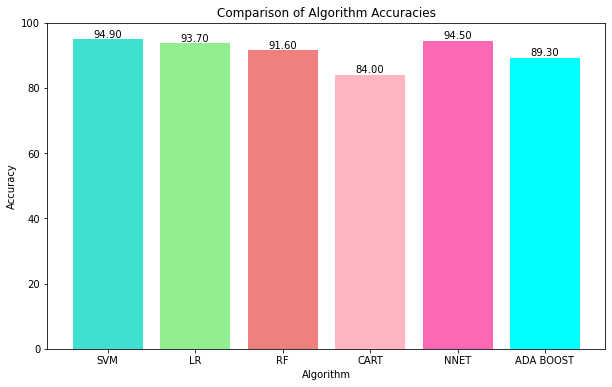

In [32]:
import matplotlib.pyplot as plt

# Data
algorithm_names = ['SVM', 'LR', 'RF', 'CART', 'NNET','ADA BOOST']
accuracies = [94.9, 93.7,91.6, 84.0, 94.5, 89.3]

# Define light decent colors for each bar
colors = ['turquoise', 'lightgreen', 'lightcoral', 'lightpink', 'hotpink', 'cyan']

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(algorithm_names, accuracies, color=colors)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Comparison of Algorithm Accuracies')
plt.ylim(0, 100)

# Add accuracy labels on top of the bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{accuracy:.2f}', ha='center', va='bottom', color='black')

# Show plot
plt.show()
